<a href="https://colab.research.google.com/github/raavimanoj016/Portfolio/blob/main/Aerofit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                                         
                                                                          
                                                                           
                                                                            
                                                                             
                                          #Aerofit - case study





#importing the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#lets import the dataset


In [9]:
url = "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749"

In [10]:
df = pd.read_csv(url)

#checking first few rows of the dataset

In [11]:
df.head(5)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# Check the structure of the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Check the summary statistics of the numerical columns

In [15]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

In [20]:
int_columns = df.select_dtypes(int).keys()

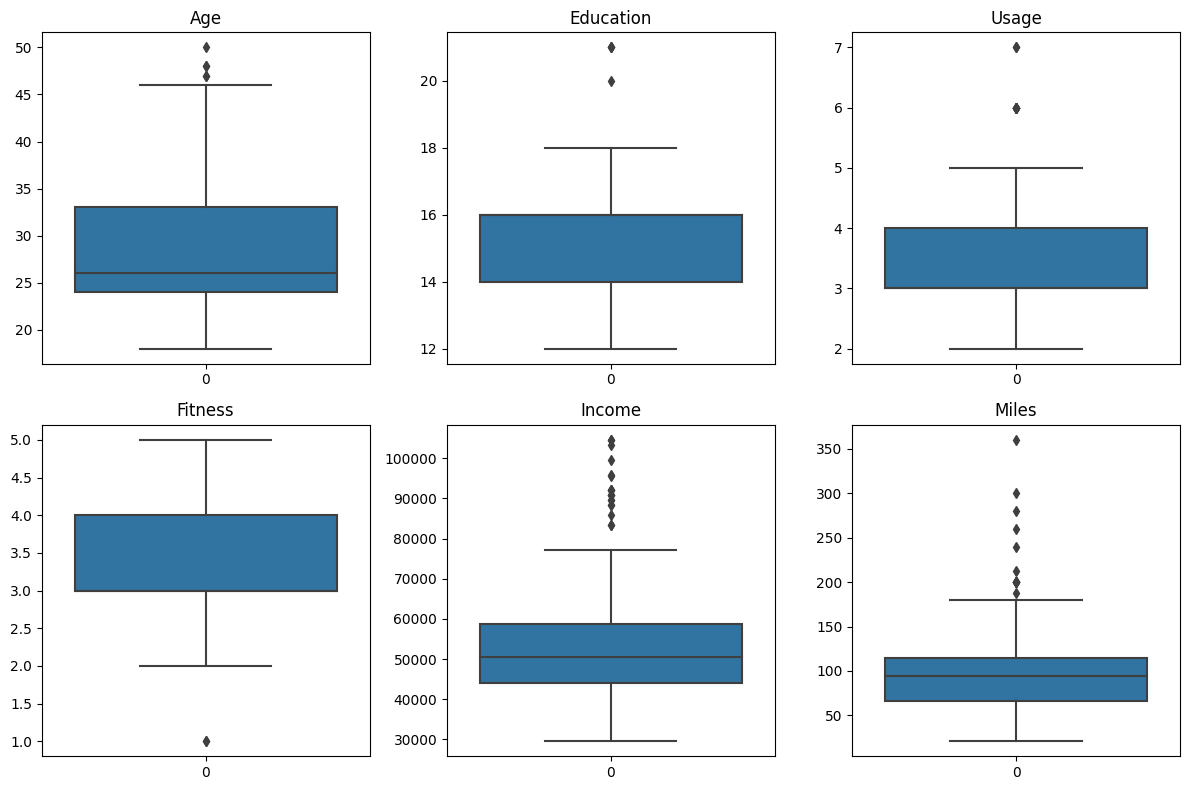

In [22]:
plt.figure(figsize=(12, 8))
for i, var in enumerate(int_columns):
    plt.subplot(2, 3, i+1)
    sns.boxplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()


In [25]:
outliers = {}
for var in int_columns:
    mean = df[var].mean()
    median = df[var].median()
    difference = mean - median
    outliers[var] = difference


In [26]:
outliers

{'Age': 2.788888888888888,
 'Education': -0.42777777777777715,
 'Usage': 0.4555555555555557,
 'Fitness': 0.3111111111111109,
 'Income': 3123.0777777777766,
 'Miles': 9.194444444444443}

#Checking if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

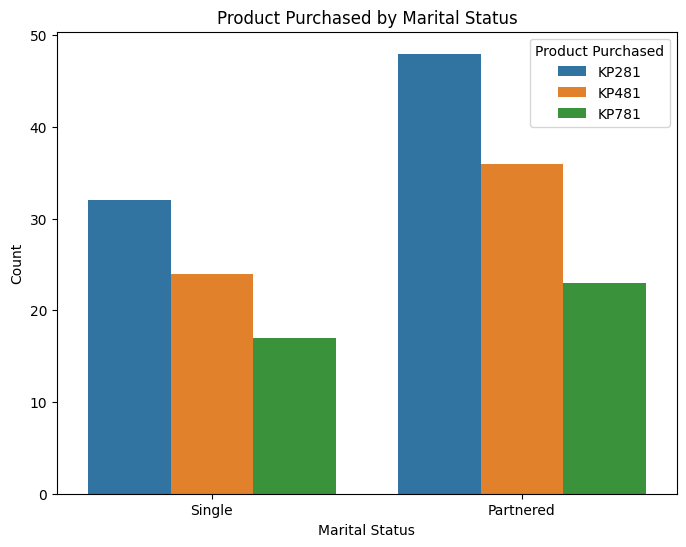

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='MaritalStatus', hue='Product', data=df)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Product Purchased by Marital Status')
plt.legend(title='Product Purchased')
plt.show()


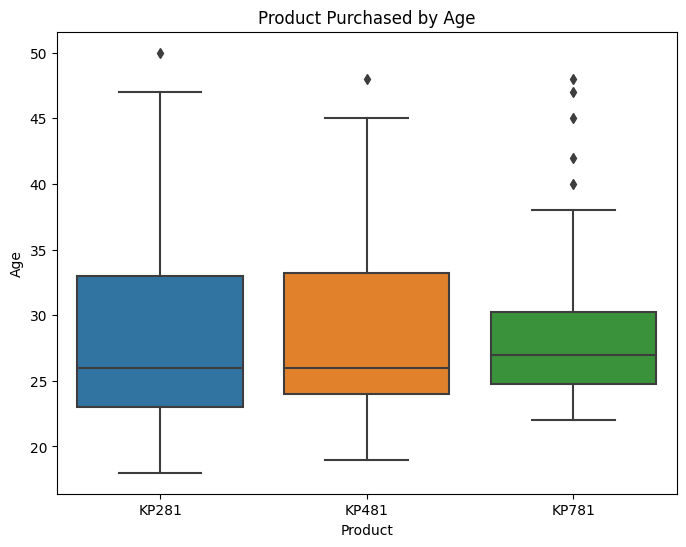

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Product', y='Age', data=df)
plt.xlabel('Product')
plt.ylabel('Age')
plt.title('Product Purchased by Age')
plt.show()


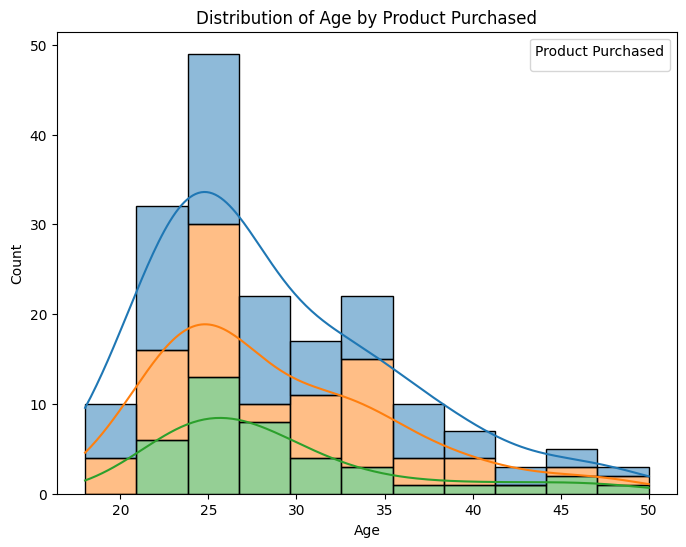

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Product', multiple='stack', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age by Product Purchased')
plt.legend(title='Product Purchased')
plt.show()


Representing the marginal probability like - what percent of customers have purchased 

In [32]:

# Create a crosstab of Product Purchased and count the occurrences
crosstab = pd.crosstab(index=df['Product'], columns='count')

# Calculate the marginal probability as a percentage
marginal_prob = (crosstab / crosstab.sum()) * 100

# Rename the column header for clarity
marginal_prob.columns = ['Marginal Probability (%)']

# Display the marginal probability table
print(marginal_prob)


         Marginal Probability (%)
Product                          
KP281                   44.444444
KP481                   33.333333
KP781                   22.222222


#Checking correlation among different factors using heat maps or pair plots.

<ipython-input-33-9f869f1167be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


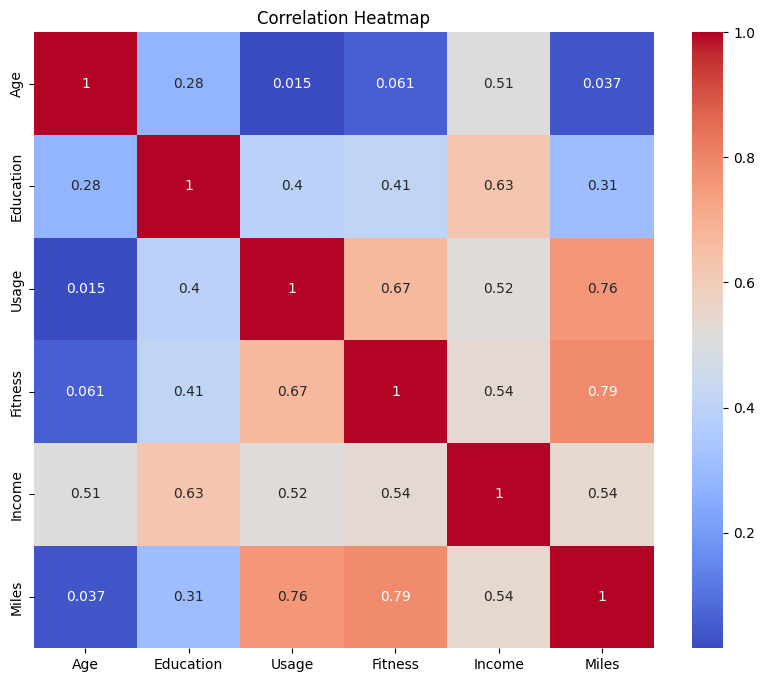

In [33]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


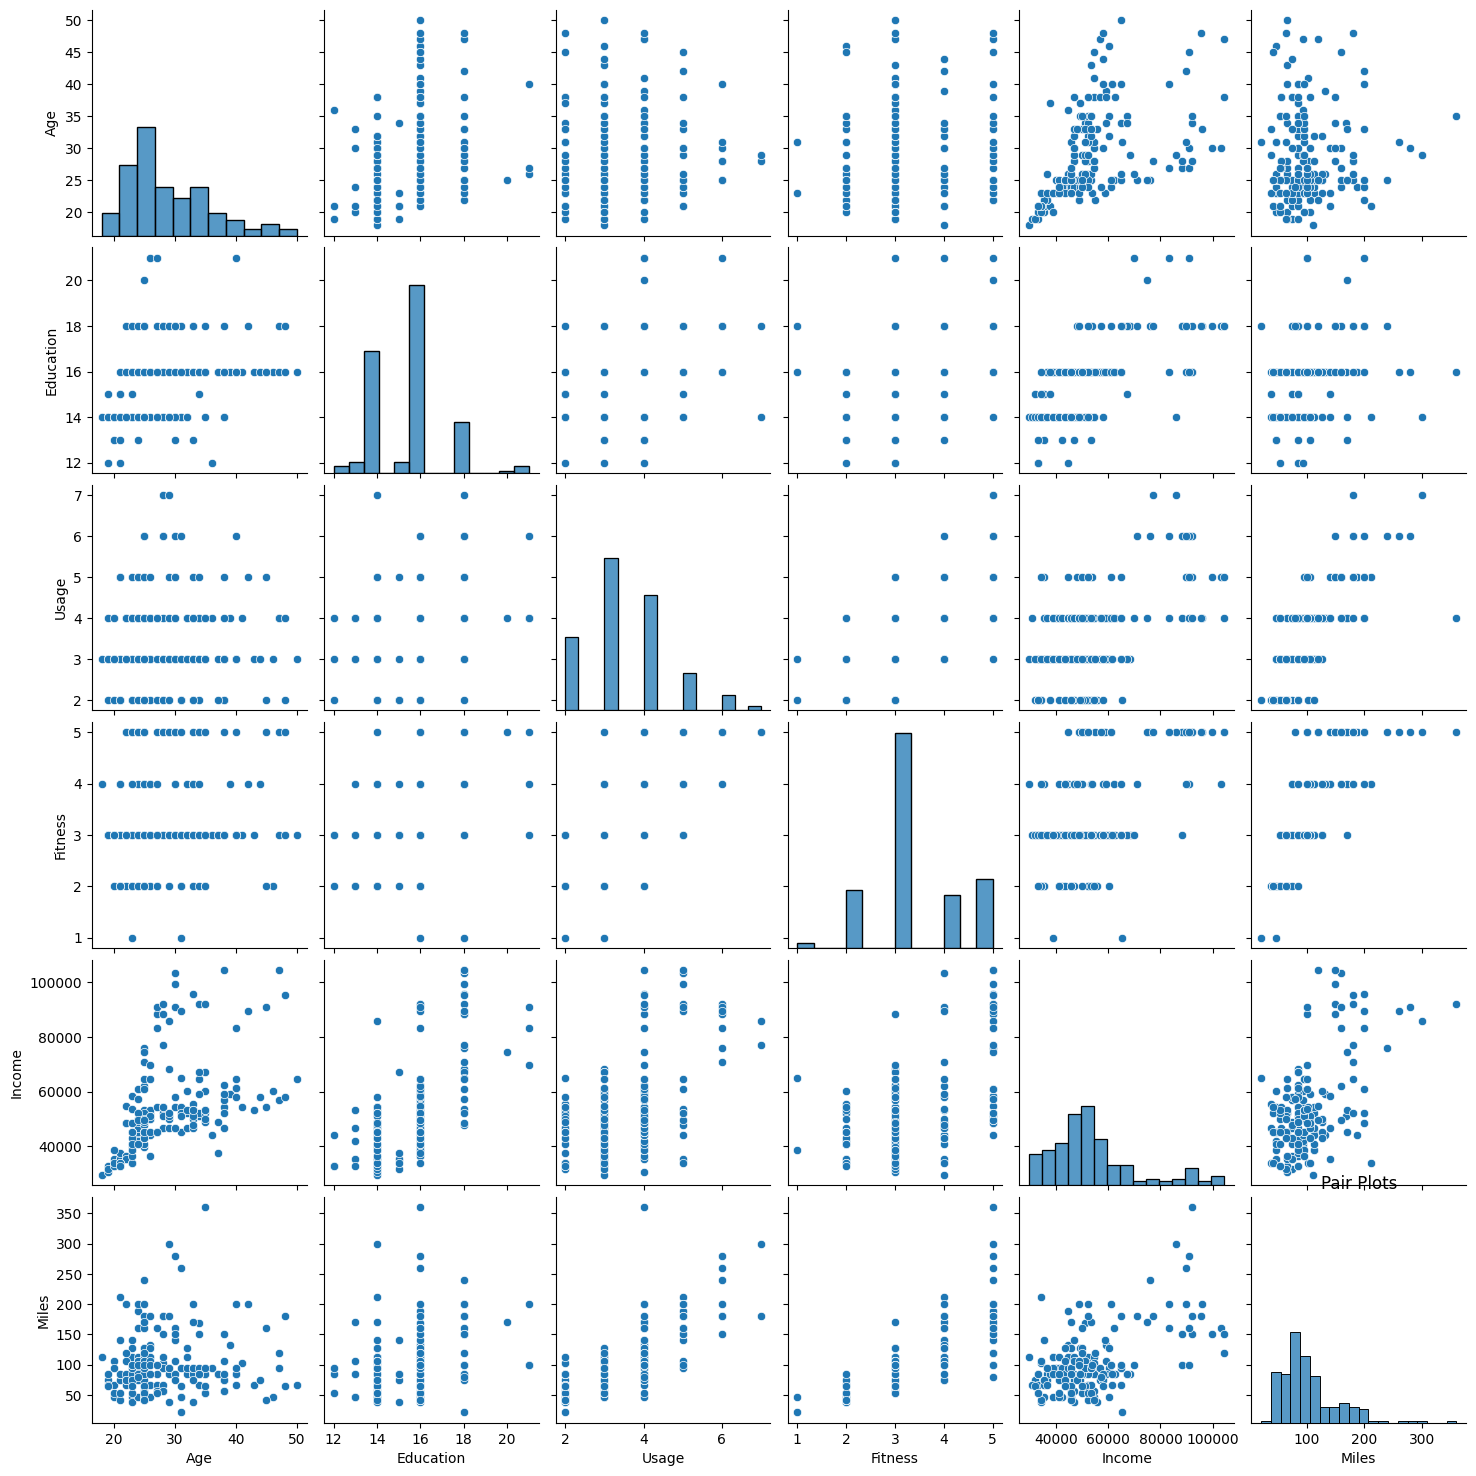

In [34]:
# Create pair plots
sns.pairplot(df)
plt.title('Pair Plots')
plt.show()


In [35]:
# Calculate the total number of male customers
total_male_customers = df[df['Gender'] == 'Male'].shape[0]

# Calculate the number of male customers who bought a KP781 treadmill
male_customers_KP781 = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')].shape[0]

# Calculate the probability
probability_male_KP781 = male_customers_KP781 / total_male_customers

print(f"The probability of a male customer buying a KP781 treadmill is: {probability_male_KP781:.2%}")


The probability of a male customer buying a KP781 treadmill is: 31.73%


#Probability- marginal, conditional probability

In [36]:
# Marginal probability of purchasing each treadmill product
marginal_prob = df['Product'].value_counts(normalize=True)

# Conditional probability of a male customer purchasing KP781 treadmill
conditional_prob = df[df['Gender'] == 'Male']['Product'].value_counts(normalize=True)['KP781']

print("Marginal Probability:")
print(marginal_prob)
print()
print("Conditional Probability (Male customer purchasing KP781):")
print(conditional_prob)


Marginal Probability:
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

Conditional Probability (Male customer purchasing KP781):
0.3173076923076923


#Some recommendations

Target marketing efforts based on customer profiles:

KP281: Younger individuals with lower incomes, beginners.
KP481: Mid-level runners seeking a balance of price and performance.
KP781: Customers prioritizing advanced features and premium quality.
Product development recommendations:

KP281: Enhance user-friendliness, affordability, and add beginner-friendly features.
KP481: Analyze customer feedback and consider customizable options, adjustable cushioning, and connectivity features.
KP781: Continue innovation with cutting-edge features, interactive displays, virtual training programs, and device integration.
Improve customer engagement:

Personalize recommendations based on customer preferences and fitness goals.
Provide excellent customer support with prompt responses and dedicated channels.
Pricing strategy:

Conduct competitive analysis to align prices with similar products in the market.
Clearly communicate the value proposition of each treadmill model based on features, quality, and customer support.